<a href="https://colab.research.google.com/github/Jorge-Maraver/Calculadora_Matrices_Vectores/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn import FunctionSampler
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector as selector
import pandas as pd
from sklearn.model_selection import GroupKFold, StratifiedKFold, StratifiedGroupKFold, KFold, cross_validate
from sklearn import set_config
from sklearn.base import clone

# Esto hace que los steps de las pipelines sean df de pandas por defecto, sino serían np arrays
set_config(transform_output="pandas")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_df = df[df.PassengerId.astype(str).str[-1] != "1"].copy()
holdout_df = df[df.PassengerId.astype(str).str[-1] == "1"].copy()

# EXPLORATORIO

In [ ]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<Axes: >

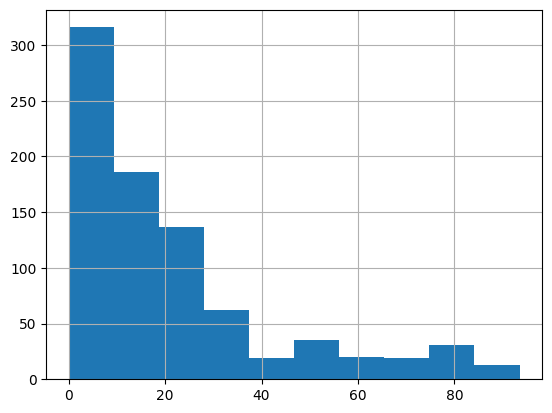

In [ ]:
df.loc[df.Fare < 100, "Fare"].hist()

In [ ]:
df.Fare.describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [ ]:
a,b = pd.cut(df.Fare, [-np.inf, 8, 16, 32, np.inf], retbins=True)

In [ ]:
a.unique()

[(-inf, 8.0], (32.0, inf], (8.0, 16.0], (16.0, 32.0]]
Categories (4, interval[float64, right]): [(-inf, 8.0] < (8.0, 16.0] < (16.0, 32.0] < (32.0, inf]]

In [ ]:
df.Cabin.astype(str)

,Cabin
0,nan
1,C85
2,nan
3,C123
4,nan
...,...
886,nan
887,B42
888,nan
889,C148


In [ ]:
df["cabin_letter"] = df.Cabin.astype(str).str[-1] != "n"

df.groupby(["cabin_letter", "Survived"]).size().unstack(1)

Survived,0,1
cabin_letter,,
False,481,206
True,68,136


In [ ]:
# OJO POSIBLE DATA LEAK
df["ticket_count"] = df.groupby("Ticket")["Ticket"].transform(lambda x: len(x))
df.ticket_count.value_counts()

,count
ticket_count,
1,547
2,188
3,63
4,44
7,21
6,18
5,10


In [ ]:
df.groupby(["ticket_count", "Survived"]).size().unstack(1)

Survived,0,1
ticket_count,,
1,384.0,163.0
2,80.0,108.0
3,19.0,44.0
4,22.0,22.0
5,10.0,NaN
6,18.0,NaN
7,16.0,5.0


In [ ]:
df["is_mister"] = df["Name"].str.contains("Mrs") | df["Name"].str.contains("Miss") | df["Name"].str.contains("Mr")

In [ ]:
df["len_name"] = df["Name"].apply(lambda x: len(x))

<Axes: >

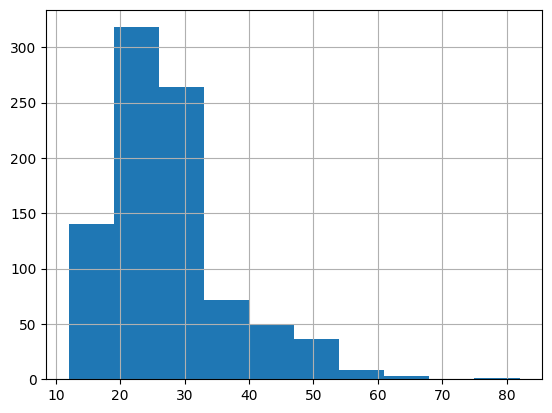

In [ ]:
df["len_name"].hist()

<Axes: xlabel='len_name', ylabel='Count'>

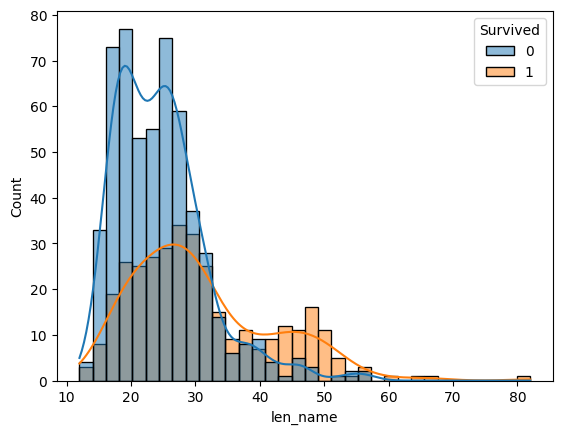

In [ ]:
sns.histplot(df, x="len_name", hue="Survived", kde=True)

In [ ]:
# Estaba balanceado?
df.Survived.value_counts()

,count
Survived,
0,549
1,342


In [ ]:
df.Age[df.Age < 1]

,Age
78,0.83
305,0.92
469,0.75
644,0.75
755,0.67
803,0.42
831,0.83


In [ ]:
#COSAS RARAS

#- EL 8 DE SIBSP -> eliminar > 6
#- EL 5 Y 6 DE PARCH -> eliminar > 3
#- LAS TARIFAS = 0 -> eliminar < 3
#- TARIFAS ALTAS -> eliminar > 300
#- EDADES DECIMALES  -> redondear al alza
# Calcular la longitud del nombre / ticket_count / cabin_letter / bin_fare

In [ ]:
def get_train_test_split(train_df):

  # Train-test split
  X = train_df.drop(columns="Survived")
  y = train_df["Survived"]
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

  return X_train, X_val, y_train, y_val

In [ ]:
def base_transform_names_out(trf, names_in):
  return ['Age', 'Parch', 'SibSp', 'Fare', 'Embarked', 'Sex', 'Pclass']

def base_transform(X):
  X[["Fare", "Age", "Parch", "SibSp"]] = X[["Fare", "Age", "Parch", "SibSp"]].apply(pd.to_numeric)
  X[["Embarked", "Sex", "Pclass"]] = X[["Embarked", "Sex", "Pclass"]].astype("category")
  return X

def get_base_preprocess_pipeline():

  trf = FunctionTransformer(base_transform, feature_names_out=base_transform_names_out)

  trf_columns = ["Age", "Parch", "SibSp", "Fare", "Embarked", "Sex", "Pclass"]
  drop_columns = ["Ticket", "PassengerId", "Cabin", "Name"]
  base_pandas_trf = ColumnTransformer(
      transformers=[
      ("trf", trf, trf_columns),
      ("drop", "drop", drop_columns)
      ],
      remainder="passthrough"
  )

  cat_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='most_frequent')),
      ('onehot', OneHotEncoder(drop="first", sparse_output=False, handle_unknown='ignore'))
  ])

  num_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='median')),
      ('scaler', StandardScaler())
  ])

  transformer = ColumnTransformer(
      transformers=[
          ('num', num_transformer, selector(dtype_exclude="category")),
          ('cat', cat_transformer, selector(dtype_include="category"))
      ])

  # Logistic Regression Classifier
  preprocess_pipeline = Pipeline(steps=[
      ('trf', base_pandas_trf),
      ('transformer', transformer),
      ('variance_threshold', VarianceThreshold(threshold=0))
      ])

  return preprocess_pipeline

In [ ]:
def get_base_pipeline():

  preprocess_pipeline = get_base_preprocess_pipeline()
  classifier = LogisticRegression()

  lr_clf = Pipeline(steps=[
      ('preprocess', preprocess_pipeline),
      ('classifier', classifier)])

  return lr_clf

In [ ]:
def test_predictions(input_pipeline, X_train, y_train, X_val, y_val):
  pipe = clone(input_pipeline)
  pipe.fit(X_train, y_train)
  print("Training with the following columns:", pipe[:-1].transform(X_train).columns)

  pipe2 = clone(pipe)
  train_resampled_indexes = pipe2[:-1].fit_transform(X_train, y_train).index
  X_train_ = X_train[X_train.index.isin(train_resampled_indexes)]
  y_train_ = y_train[y_train.index.isin(train_resampled_indexes)]
  y_train_pred = pipe.predict(X_train_)

  print(f"Accuracy on Training Set: {accuracy_score(y_train, pipe.predict(X_train)):.4f} // (resampled): {accuracy_score(y_train_, y_train_pred):.4f}")
  print(f"Accuracy on Validation Set: {pipe.score(X_val, y_val):.4f}")
  print("Classification report:")
  print(classification_report(y_val, pipe.predict(X_val)))
  print("Confusion Matrix:")
  print(confusion_matrix(y_val, pipe.predict(X_val)))

In [ ]:
# Revisamos cross validation
def get_cv_scores(input_pipeline, train_df):

  cvs = [
    KFold(n_splits=5),
    StratifiedKFold(n_splits=5),
    GroupKFold(n_splits=5), # Agrupamos por ticket. Asumimos que los registros no son independientes
    StratifiedGroupKFold(n_splits=5)]

  for cv in cvs:
    print(cv.__class__.__name__)
    pipe = clone(input_pipeline)
    default_cv_score = cross_validate(pipe, train_df.drop(columns="Survived"), train_df["Survived"], cv=cv, groups=train_df["Ticket"])
    print("All splits:", default_cv_score["test_score"])
    print("Mean Score:", np.mean(default_cv_score["test_score"]))


In [ ]:
X_train, X_val, y_train, y_val = get_train_test_split(train_df)
pipe = get_base_pipeline()
x_transformed = pipe[:-1].fit_transform(X_train, y_train)
x_transformed

,num__trf__Age,num__trf__Parch,num__trf__SibSp,num__trf__Fare,cat__trf__Embarked_Q,cat__trf__Embarked_S,cat__trf__Sex_male,cat__trf__Pclass_2,cat__trf__Pclass_3
635,-0.097616,-0.481519,-0.453916,-0.363417,0.0,1.0,0.0,1.0,0.0
184,-1.938835,1.974037,-0.453916,-0.191414,0.0,1.0,0.0,0.0,1.0
444,-0.097616,-0.481519,-0.453916,-0.456566,0.0,1.0,1.0,0.0,1.0
255,-0.020898,1.974037,-0.453916,-0.320616,0.0,0.0,0.0,0.0,1.0
58,-1.862117,1.974037,0.437207,-0.082303,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
379,-0.788073,-0.481519,-0.453916,-0.462999,0.0,1.0,1.0,0.0,1.0
731,-1.401812,-0.481519,-0.453916,-0.253116,0.0,0.0,1.0,0.0,1.0
474,-0.557920,-0.481519,-0.453916,-0.423690,0.0,1.0,0.0,0.0,1.0
589,-0.097616,-0.481519,-0.453916,-0.457758,0.0,1.0,1.0,0.0,1.0


In [ ]:
x_transformed.describe()

,num__trf__Age,num__trf__Parch,num__trf__SibSp,num__trf__Fare,cat__trf__Embarked_Q,cat__trf__Embarked_S,cat__trf__Sex_male,cat__trf__Pclass_2,cat__trf__Pclass_3
count,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,640.000000,640.000000,640.000000,640.000000,640.000000
mean,3.330669e-17,-1.110223e-17,-8.326673e-18,5.551115e-18,0.085938,0.717187,0.648438,0.212500,0.553125
std,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,0.280491,0.450718,0.477832,0.409397,0.497559
min,-2.213483e+00,-4.815193e-01,-4.539157e-01,-6.111791e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.579205e-01,-4.815193e-01,-4.539157e-01,-4.606963e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-9.761577e-02,-4.815193e-01,-4.539157e-01,-3.538882e-01,0.000000,1.000000,1.000000,0.000000,1.000000
75%,4.585858e-01,-4.815193e-01,4.372072e-01,-2.616052e-02,0.000000,1.000000,1.000000,0.000000,1.000000
max,3.431387e+00,6.885151e+00,6.675068e+00,9.153092e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test_predictions(pipe, X_train, y_train, X_val, y_val)

Training with the following columns: Index(['num__trf__Age', 'num__trf__Parch', 'num__trf__SibSp', 'num__trf__Fare',
       'cat__trf__Embarked_Q', 'cat__trf__Embarked_S', 'cat__trf__Sex_male',
       'cat__trf__Pclass_2', 'cat__trf__Pclass_3'],
      dtype='object')
Accuracy on Training Set: 0.8063 // (resampled): 0.8063
Accuracy on Validation Set: 0.8199
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       100
           1       0.80      0.70      0.75        61

    accuracy                           0.82       161
   macro avg       0.81      0.80      0.80       161
weighted avg       0.82      0.82      0.82       161

Confusion Matrix:
[[89 11]
 [18 43]]


In [ ]:
get_cv_scores(pipe, train_df)

KFold


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


All splits: [0.7826087 0.8       0.7875    0.75625   0.8375   ]
Mean Score: 0.7927717391304349
StratifiedKFold


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:877: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


All splits: [0.79503106 0.80625    0.78125    0.78125    0.81875   ]
Mean Score: 0.7965062111801242
GroupKFold
All splits: [0.77639752 0.78125    0.78125    0.85       0.7875    ]
Mean Score: 0.7952795031055901
StratifiedGroupKFold
All splits: [0.81875   0.7625    0.825     0.79375   0.7826087]
Mean Score: 0.7965217391304348


# FEATURE ENGINEERING + CLEANING

Cómo podemos mejorar??

- Feature engineering / Cleaning
- Probar otras técnicas de preprocesado**
- Manejar desbalanceo de clases
- Tuning de hiperparámetros
- Feature selection**

In [ ]:
def clean_outliers(X, y, multiplier=1.5):
  if not multiplier:
    return X, y

  lower_bound_ = {}
  upper_bound_ = {}
  # Solo acepta dataframes como input
  assert isinstance(X, pd.DataFrame)

  columns_ = X.select_dtypes(include=[np.number]).columns.tolist()
  for col in columns_:
      Q1 = X[col].quantile(0.25)
      Q3 = X[col].quantile(0.75)
      IQR = Q3 - Q1
      if IQR <= 0:
        lower_bound_[col] = -np.inf
        upper_bound_[col] = np.inf
      else:
        lower_bound_[col] = Q1 - multiplier * IQR
        upper_bound_[col] = Q3 + multiplier * IQR

  mask = np.ones(len(X), dtype=bool)
  for col in columns_:
      mask &= X[col].isnull() | ((X[col] >= lower_bound_[col]) & (X[col] <= upper_bound_[col]))

  X_res = X[mask].copy()

  # Para gestionar que y sea una pd.Series o un array
  if hasattr(y, 'loc'):
      y_res = y.loc[mask].copy()
  else:
      y_res = np.array(y)[mask]

  return X_res, y_res

def full_transform(X):
  X[["Fare", "Age", "Parch", "SibSp"]] = X[["Fare", "Age", "Parch", "SibSp"]].apply(pd.to_numeric)
  #X["bin_fare"] = pd.cut(X.Fare, [-np.inf, 8, 16, 32, np.inf], labels=range(4), duplicates="drop").astype(int)
  X["Age"] = np.ceil(X.Age)
  X["len_name"] = X.Name.str.len().astype(float)
  X["cabin_letter"] = (X.Cabin.astype(str).str[0] != "n")
  X["is_mister"] = X["Name"].str.contains("Mrs") | X["Name"].str.contains("Miss") | X["Name"].str.contains("Mr")
  X = X.drop(columns=["Cabin", "Name", "Ticket"])
  X[["Embarked", "Pclass"]] = X[["Embarked", "Pclass"]].astype("category")
  return X

def get_full_preprocess_pipeline():
  # Preprocessing pipeline
  trf = FunctionTransformer(full_transform)

  trf_columns = ["Cabin", "Name", "Age", "Parch", "SibSp", "Fare", "Embarked", "Sex", "Pclass", "Ticket"]
  drop_columns = ["PassengerId"]
  pandas_trf = ColumnTransformer(
      transformers=[
      ("trf", trf, trf_columns),
      ("drop", "drop", drop_columns)
      ],
  )

  cat_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='most_frequent')),
      ('onehot', OneHotEncoder(drop="first", sparse_output=False, handle_unknown='ignore'))
  ])

  num_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='median')),
      ('scaler', StandardScaler())
  ])

  transformer = ColumnTransformer(
      transformers=[
          ('num', num_transformer, selector(dtype_exclude=["category", "object"])),
          ('cat', cat_transformer, selector(dtype_include=["category", "object"]))
      ])

  # ImbPipeline porque usamos un step de resampling. Siempre que modifiquemos el tamaño de filas (en el X de entrenamiento), debemos usar Imblearn
  preprocess_pipeline = ImbPipeline(steps=[
      ('trf', pandas_trf),
      ('outlier_remover', FunctionSampler(func=clean_outliers, validate=False, kw_args={"multiplier": 1.5})),
      ('transformer', transformer),
      ('variance_threshold', VarianceThreshold()),
      ])

  return preprocess_pipeline

In [ ]:
def get_full_pipeline():

  preprocess_pipeline = get_full_preprocess_pipeline()
  classifier = LogisticRegression()

  lr_clf = ImbPipeline(steps=[
      *preprocess_pipeline.steps, # Trocear por steps si es una ImbPipeline. Da error
      ('classifier', classifier)])

  return lr_clf

In [ ]:
# FEATURE ENGINEERING + CLEANING

X_train, X_val, y_train, y_val = get_train_test_split(train_df)
pipe = clone(get_full_pipeline())
x_transformed = pipe[:-1].fit_transform(X_train, y_train)  # Cuando usamos ImbPipeline hay que pasar X, y en transform
x_transformed

,num__trf__Age,num__trf__Parch,num__trf__SibSp,num__trf__Fare,num__trf__len_name,num__trf__cabin_letter,num__trf__is_mister,cat__trf__Embarked_Q,cat__trf__Embarked_S,cat__trf__Sex_male,cat__trf__Pclass_2,cat__trf__Pclass_3
635,-0.083170,-0.381844,-0.486163,-0.267658,-1.180413,-0.422965,0.240027,0.0,1.0,0.0,1.0,0.0
184,-2.083129,2.235059,-0.486163,0.420870,1.255719,-0.422965,0.240027,0.0,1.0,0.0,0.0,1.0
444,-0.083170,-0.381844,-0.486163,-0.640531,0.985038,-0.422965,0.240027,0.0,1.0,1.0,0.0,1.0
255,0.000162,2.235059,-0.486163,-0.096323,1.797082,-0.422965,0.240027,0.0,0.0,0.0,0.0,1.0
58,-1.999797,2.235059,1.579027,0.857637,0.308334,-0.422965,0.240027,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
379,-0.833154,-0.381844,-0.486163,-0.666280,0.172994,-0.422965,0.240027,0.0,1.0,1.0,0.0,1.0
731,-1.499807,-0.381844,-0.486163,0.173877,-0.233028,-0.422965,0.240027,0.0,0.0,1.0,0.0,1.0
474,-0.583159,-0.381844,-0.486163,-0.508929,0.172994,-0.422965,0.240027,0.0,1.0,0.0,0.0,1.0
589,-0.083170,-0.381844,-0.486163,-0.645299,-0.909732,-0.422965,0.240027,0.0,1.0,1.0,0.0,1.0


In [ ]:
lr_clf = get_full_pipeline()
test_predictions(lr_clf, X_train, y_train, X_val, y_val)

Training with the following columns: Index(['num__trf__Age', 'num__trf__Parch', 'num__trf__SibSp', 'num__trf__Fare',
       'num__trf__len_name', 'num__trf__cabin_letter', 'num__trf__is_mister',
       'cat__trf__Embarked_Q', 'cat__trf__Embarked_S', 'cat__trf__Sex_male',
       'cat__trf__Pclass_2', 'cat__trf__Pclass_3'],
      dtype='object')
Accuracy on Training Set: 0.8313 // (resampled): 0.8313
Accuracy on Validation Set: 0.8261
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       100
           1       0.81      0.70      0.75        61

    accuracy                           0.83       161
   macro avg       0.82      0.80      0.81       161
weighted avg       0.82      0.83      0.82       161

Confusion Matrix:
[[90 10]
 [18 43]]


In [ ]:
get_cv_scores(lr_clf, train_df)

KFold


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


All splits: [0.83850932 0.80625    0.8        0.80625    0.8375    ]
Mean Score: 0.8177018633540373
StratifiedKFold


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:877: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


All splits: [0.83850932 0.7875     0.80625    0.825      0.83125   ]
Mean Score: 0.8177018633540373
GroupKFold
All splits: [0.77018634 0.81875    0.84375    0.88125    0.7875    ]
Mean Score: 0.8202872670807453
StratifiedGroupKFold
All splits: [0.8375    0.8125    0.85      0.79375   0.8136646]
Mean Score: 0.8214829192546584


# CORRECCIÓN DEL DESBALANCEO

In [ ]:
# Desbalanceo de clases (IMBLEARN)
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

def get_pipeline_rus():
  preprocessor = get_full_preprocess_pipeline()

  # Logistic Regression Classifier
  lr_clf = ImbPipeline(steps=[
      ('rus', RandomUnderSampler(random_state=42)),
      *preprocessor.steps,
      ('classifier', LogisticRegression())
      ]
  )

  return lr_clf

def get_pipeline_ros():
  preprocessor = get_full_preprocess_pipeline()

  lr_clf = ImbPipeline(steps=[
      *preprocessor.steps,
      ('ros', RandomOverSampler(random_state=42)),
      ('passthrough', ColumnTransformer(transformers=[], remainder="passthrough")), # Necesitamos un step con el método transform para que las pipeline tengan la misma estructura
      ('classifier', LogisticRegression())
      ]
  )

  return lr_clf

def get_pipeline_smote():
  from imblearn.pipeline import Pipeline

  preprocessor = get_full_preprocess_pipeline()

  lr_clf = ImbPipeline(steps=[
      *preprocessor.steps,
      ('ros', SMOTE(random_state=42)),
      ('passthrough', ColumnTransformer(transformers=[], remainder="passthrough")),
      ('classifier', LogisticRegression())
      ]
  )

  return lr_clf

def get_pipeline_balanced():
  # Preprocessing pipeline
  preprocessor = get_full_preprocess_pipeline()

  # Logistic Regression Classifier
  lr_clf = ImbPipeline(steps=[
      *preprocessor.steps,
      ('classifier', LogisticRegression(class_weight="balanced"))
      ]
  )

  return lr_clf

In [ ]:
lr_clf = get_pipeline_rus()
test_predictions(lr_clf, X_train, y_train, X_val, y_val)

Training with the following columns: Index(['num__trf__Age', 'num__trf__Parch', 'num__trf__SibSp', 'num__trf__Fare',
       'num__trf__len_name', 'num__trf__cabin_letter', 'num__trf__is_mister',
       'cat__trf__Embarked_Q', 'cat__trf__Embarked_S', 'cat__trf__Sex_male',
       'cat__trf__Pclass_2', 'cat__trf__Pclass_3'],
      dtype='object')
Accuracy on Training Set: 0.7703 // (resampled): 0.7874
Accuracy on Validation Set: 0.7578
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       100
           1       0.65      0.77      0.71        61

    accuracy                           0.76       161
   macro avg       0.75      0.76      0.75       161
weighted avg       0.77      0.76      0.76       161

Confusion Matrix:
[[75 25]
 [14 47]]


In [ ]:
lr_clf = get_pipeline_ros()
test_predictions(lr_clf, X_train, y_train, X_val, y_val)

Training with the following columns: Index(['remainder__num__trf__Age', 'remainder__num__trf__Parch',
       'remainder__num__trf__SibSp', 'remainder__num__trf__Fare',
       'remainder__num__trf__len_name', 'remainder__num__trf__cabin_letter',
       'remainder__num__trf__is_mister', 'remainder__cat__trf__Embarked_Q',
       'remainder__cat__trf__Embarked_S', 'remainder__cat__trf__Sex_male',
       'remainder__cat__trf__Pclass_2', 'remainder__cat__trf__Pclass_3'],
      dtype='object')
Accuracy on Training Set: 0.7688 // (resampled): 0.7556
Accuracy on Validation Set: 0.7702
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       100
           1       0.65      0.84      0.73        61

    accuracy                           0.77       161
   macro avg       0.77      0.78      0.77       161
weighted avg       0.79      0.77      0.77       161

Confusion Matrix:
[[73 27]
 [10 51]]


In [ ]:
lr_clf = get_pipeline_smote()
test_predictions(lr_clf, X_train, y_train, X_val, y_val)

Training with the following columns: Index(['remainder__num__trf__Age', 'remainder__num__trf__Parch',
       'remainder__num__trf__SibSp', 'remainder__num__trf__Fare',
       'remainder__num__trf__len_name', 'remainder__num__trf__cabin_letter',
       'remainder__num__trf__is_mister', 'remainder__cat__trf__Embarked_Q',
       'remainder__cat__trf__Embarked_S', 'remainder__cat__trf__Sex_male',
       'remainder__cat__trf__Pclass_2', 'remainder__cat__trf__Pclass_3'],
      dtype='object')
Accuracy on Training Set: 0.7750 // (resampled): 0.7637
Accuracy on Validation Set: 0.7578
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       100
           1       0.65      0.79      0.71        61

    accuracy                           0.76       161
   macro avg       0.75      0.76      0.75       161
weighted avg       0.77      0.76      0.76       161

Confusion Matrix:
[[74 26]
 [13 48]]


In [ ]:
lr_clf = get_pipeline_balanced()
test_predictions(lr_clf, X_train, y_train, X_val, y_val)

Training with the following columns: Index(['num__trf__Age', 'num__trf__Parch', 'num__trf__SibSp', 'num__trf__Fare',
       'num__trf__len_name', 'num__trf__cabin_letter', 'num__trf__is_mister',
       'cat__trf__Embarked_Q', 'cat__trf__Embarked_S', 'cat__trf__Sex_male',
       'cat__trf__Pclass_2', 'cat__trf__Pclass_3'],
      dtype='object')
Accuracy on Training Set: 0.7781 // (resampled): 0.8113
Accuracy on Validation Set: 0.7640
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       100
           1       0.65      0.80      0.72        61

    accuracy                           0.76       161
   macro avg       0.76      0.77      0.76       161
weighted avg       0.78      0.76      0.77       161

Confusion Matrix:
[[74 26]
 [12 49]]


# TUNING HIPERPARÁMETROS SOBRE EL MODELO BASE

In [ ]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__penalty': [None, 'l1', 'l2'],
    'classifier__solver': ['lbfgs', 'liblinear', 'saga'],
}
lr_clf = get_base_pipeline()

# Pensar bien las estrategias de cross validation
cv = StratifiedKFold(n_splits=5)
cv = GroupKFold(n_splits=5) # Agrupamos por ticket. Asumimos que los registros no son independientes
cv = StratifiedGroupKFold(n_splits=5)
cv = KFold(n_splits=5)

grid_search = GridSearchCV(lr_clf, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(train_df.drop(columns="Survived"), train_df["Survived"], groups=train_df["Ticket"])

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  w

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        Pipeline(steps=[('trf',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('trf',
                                                                                          FunctionTransformer(feature_names_out=<function base_transform_names_out at 0x7abdabb5bce0>,
                                                                                                              func=<function base_transform at 0x7abdabb5af20>),
                                                                                          ['Age',
                                                                                           'Parch',
                                                                                           'SibSp'...
                                                                                                                         sparse_output=False))]),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7abdabd58b90>)])),
                                                        ('variance_threshold',
                                                         VarianceThreshold(threshold=0))])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'classifier__penalty': [None, 'l1', 'l2'],
                         'classifier__solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
default_cv_score = cross_validate(lr_clf, train_df.drop(columns="Survived"), train_df["Survived"], cv=cv, groups=train_df["Ticket"])
print("Default Score:", np.mean(default_cv_score["test_score"]))

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on Validation Set
y_pred = grid_search.predict(X_val)
print("Accuracy on Validation Set:", accuracy_score(y_val, y_pred))
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Default Score: 0.7927717391304349
Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best Score: 0.8002484472049689
Accuracy on Validation Set: 0.8136645962732919
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       100
           1       0.79      0.69      0.74        61

    accuracy                           0.81       161
   macro avg       0.81      0.79      0.80       161
weighted avg       0.81      0.81      0.81       161

Confusion Matrix:
[[89 11]
 [19 42]]


# TUNING DE HIPERPARÁMETROS SOBRE MODELO BALANCEADO

In [ ]:
# Hyperparameter Tuning with GridSearchCV
# OJO: Definiendo un único grid puede haber combinaciones que no tengan sentido!
param_grid = [
    {'classifier__penalty': [None],
     'classifier__solver': ['lbfgs', 'newton-cg'],
     'outlier_remover__kw_args': [{"multiplier": 0}, {"multiplier": 1.5}, {"multiplier": 3}, {"multiplier": 10}]},
    {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
     'classifier__penalty': ['l2'],
     'classifier__solver': ['lbfgs', 'newton-cg', 'saga'],
     'outlier_remover__kw_args': [{"multiplier": 0}, {"multiplier": 1.5}, {"multiplier": 3}, {"multiplier": 10}]},
    {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
     'classifier__penalty': ['l1'],
     'classifier__solver': ['liblinear', 'saga'],
     'outlier_remover__kw_args': [{"multiplier": 0}, {"multiplier": 1.5}, {"multiplier": 3}, {"multiplier": 10}]},
]
lr_clf = get_full_pipeline()
grid_search = GridSearchCV(lr_clf, param_grid, cv=cv, scoring='accuracy', verbose=4)
grid_search.fit(train_df.drop(columns="Survived"), train_df["Survived"], groups=train_df["Ticket"])

Fitting 5 folds for each of 148 candidates, totalling 740 fits
[CV 1/5] END classifier__penalty=None, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 0};, score=0.839 total time=   0.1s
[CV 2/5] END classifier__penalty=None, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 3/5] END classifier__penalty=None, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


[CV 4/5] END classifier__penalty=None, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 0};, score=0.806 total time=   0.1s
[CV 5/5] END classifier__penalty=None, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 0};, score=0.844 total time=   0.1s
[CV 1/5] END classifier__penalty=None, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 1.5};, score=0.720 total time=   0.1s
[CV 2/5] END classifier__penalty=None, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 1.5};, score=0.806 total time=   0.1s
[CV 3/5] END classifier__penalty=None, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 1.5};, score=0.775 total time=   0.1s
[CV 4/5] END classifier__penalty=None, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 1.5};, score=0.781 total time=   0.1s
[CV 5/5] END classifier__penalty=None, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 1.5};, score=0.825 total time=   0.1s
[CV

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.806 total time=   0.1s
[CV 3/5] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 4/5] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.806 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.838 total time=   0.1s
[CV 1/5] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.727 total time=   0.1s
[CV 2/5] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.806 total time=   0.1s
[CV 3/5] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.775 total time=   0.1s
[CV 4/5] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.781 total time=   0.1s
[CV 5/5] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.825 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.814 total time=   0.1s
[CV 2/5] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.806 total time=   0.1s
[CV 3/5] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.769 total time=   0.1s
[CV 4/5] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.806 total time=   0.1s
[CV 5/5] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.825 total time=   0.1s
[CV 1/5] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.832 total time=   0.1s
[CV 2/5] END classifier__C=1, classifier__penalty=l2, classifier__sol

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 3/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 4/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.806 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.844 total time=   0.1s
[CV 1/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.720 total time=   0.1s
[CV 2/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.806 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.775 total time=   0.1s
[CV 4/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.781 total time=   0.1s
[CV 5/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.825 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.807 total time=   0.1s
[CV 2/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.806 total time=   0.1s
[CV 3/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.775 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.806 total time=   0.1s
[CV 5/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.831 total time=   0.1s
[CV 1/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.832 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.800 total time=   0.1s
[CV 3/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.806 total time=   0.1s
[CV 4/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.800 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.838 total time=   0.1s
[CV 1/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 0};, score=0.839 total time=   0.1s
[CV 2/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 3/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 4/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 0};, score=0.806 total time=   0.1s
[CV 5/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 0};, score=0.844 total time=   0.1s
[CV 1/5] END classifier__C=100, classifier__penalty=l

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 4/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.806 total time=   0.1s
[CV 5/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.844 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.720 total time=   0.1s
[CV 2/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.806 total time=   0.1s
[CV 3/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.775 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.781 total time=   0.1s
[CV 5/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.825 total time=   0.1s
[CV 1/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.807 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.806 total time=   0.1s
[CV 3/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.775 total time=   0.1s
[CV 4/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.806 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.831 total time=   0.1s
[CV 1/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.832 total time=   0.1s
[CV 2/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.800 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.806 total time=   0.1s
[CV 4/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.800 total time=   0.1s
[CV 5/5] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.838 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 0};, score=0.839 total time=   0.1s
[CV 2/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 3/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 4/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 0};, score=0.806 total time=   0.1s
[CV 5/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 0};, score=0.844 total time=   0.1s
[CV 1/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=lbfgs, outlier_remover__kw_args={'multiplier': 1.5};, score=0.720 total time=   0.1s
[CV 2/5] END classifier__C=1000, classifier_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.839 total time=   0.1s
[CV 2/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 3/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.806 total time=   0.1s
[CV 5/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.844 total time=   0.1s
[CV 1/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.720 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.806 total time=   0.1s
[CV 3/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.775 total time=   0.1s
[CV 4/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.781 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.825 total time=   0.1s
[CV 1/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.807 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.806 total time=   0.1s
[CV 3/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.775 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.806 total time=   0.1s
[CV 5/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.831 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.832 total time=   0.1s
[CV 2/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.800 total time=   0.1s
[CV 3/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.806 total time=   0.1s
[CV 4/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.800 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END classifier__C=1000, classifier__penalty=l2, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.838 total time=   0.1s
[CV 1/5] END classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, outlier_remover__kw_args={'multiplier': 0};, score=0.640 total time=   0.1s
[CV 2/5] END classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, outlier_remover__kw_args={'multiplier': 0};, score=0.556 total time=   0.1s
[CV 3/5] END classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, outlier_remover__kw_args={'multiplier': 0};, score=0.631 total time=   0.1s
[CV 4/5] END classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, outlier_remover__kw_args={'multiplier': 0};, score=0.619 total time=   0.1s
[CV 5/5] END classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, outlier_remover__kw_args={'multiplier': 0};, score=0.656 total time=   0.1s
[CV 1/5] END classifi

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END classifier__C=1, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 5/5] END classifier__C=1, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.844 total time=   0.1s
[CV 1/5] END classifier__C=1, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.727 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END classifier__C=1, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.806 total time=   0.1s
[CV 3/5] END classifier__C=1, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.775 total time=   0.1s
[CV 4/5] END classifier__C=1, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.775 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END classifier__C=1, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.819 total time=   0.1s
[CV 1/5] END classifier__C=1, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.807 total time=   0.1s
[CV 2/5] END classifier__C=1, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.806 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END classifier__C=1, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.781 total time=   0.1s
[CV 4/5] END classifier__C=1, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.806 total time=   0.1s
[CV 5/5] END classifier__C=1, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.825 total time=   0.1s
[CV 1/5] END classifier__C=1, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.839 total time=   0.1s
[CV 2/5] END classifier__C=1, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.800 total time=   0.1s
[CV 3/5] END classifier__C=1, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.800 total time=   0.1s
[CV 4/5] END classifier__C=1, classifier__penalty=l1, classifier__s

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.839 total time=   0.1s
[CV 2/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 3/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.806 total time=   0.1s
[CV 5/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.856 total time=   0.1s
[CV 1/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.720 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.806 total time=   0.1s
[CV 3/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.775 total time=   0.1s
[CV 4/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.781 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.825 total time=   0.1s
[CV 1/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.807 total time=   0.1s
[CV 2/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.806 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.775 total time=   0.1s
[CV 4/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.806 total time=   0.1s
[CV 5/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.831 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.839 total time=   0.1s
[CV 2/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.800 total time=   0.1s
[CV 3/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.806 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.800 total time=   0.1s
[CV 5/5] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.831 total time=   0.1s
[CV 1/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear, outlier_remover__kw_args={'multiplier': 0};, score=0.839 total time=   0.1s
[CV 2/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 3/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 4/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear, outlier_remover__kw_args={'multiplier': 0};, score=0.806 total time=   0.1s
[CV 5/5] END classifier__C=100, classi

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 3/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 4/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.806 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.844 total time=   0.1s
[CV 1/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.720 total time=   0.1s
[CV 2/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.806 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.775 total time=   0.1s
[CV 4/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.781 total time=   0.1s
[CV 5/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.825 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.807 total time=   0.1s
[CV 2/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.806 total time=   0.1s
[CV 3/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.775 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.806 total time=   0.1s
[CV 5/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.831 total time=   0.1s
[CV 1/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.832 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.800 total time=   0.1s
[CV 3/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.806 total time=   0.1s
[CV 4/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.800 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.838 total time=   0.1s
[CV 1/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=liblinear, outlier_remover__kw_args={'multiplier': 0};, score=0.839 total time=   0.1s
[CV 2/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=liblinear, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 3/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=liblinear, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 4/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=liblinear, outlier_remover__kw_args={'multiplier': 0};, score=0.806 total time=   0.1s
[CV 5/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=liblinear, outlier_remover__kw_args={'multiplier': 0};, score=0.844 total time=   0.1s
[CV 1/5] END classifier__C=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 3/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.800 total time=   0.1s
[CV 4/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.806 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 0};, score=0.844 total time=   0.1s
[CV 1/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.720 total time=   0.1s
[CV 2/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.806 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.775 total time=   0.1s
[CV 4/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.781 total time=   0.1s
[CV 5/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 1.5};, score=0.825 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.807 total time=   0.1s
[CV 2/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.806 total time=   0.1s
[CV 3/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.775 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.806 total time=   0.1s
[CV 5/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 3};, score=0.831 total time=   0.1s
[CV 1/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.832 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.800 total time=   0.1s
[CV 3/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.806 total time=   0.1s
[CV 4/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.800 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END classifier__C=1000, classifier__penalty=l1, classifier__solver=saga, outlier_remover__kw_args={'multiplier': 10};, score=0.838 total time=   0.1s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('trf',
                                        ColumnTransformer(transformers=[('trf',
                                                                         FunctionTransformer(func=<function full_transform at 0x7abdac961760>),
                                                                         ['Cabin',
                                                                          'Name',
                                                                          'Age',
                                                                          'Parch',
                                                                          'SibSp',
                                                                          'Fare',
                                                                          'Embarked',
                                                                          'Sex',
                                                                          'Pclass',
                                                                          'Ticket']),
                                                                        ('drop',
                                                                         'drop',
                                                                         ['PassengerId'])])),
                                       ('outlier_remover',
                                        FunctionS...
                          'outlier_remover__kw_args': [{'multiplier': 0},
                                                       {'multiplier': 1.5},
                                                       {'multiplier': 3},
                                                       {'multiplier': 10}]},
                         {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'classifier__penalty': ['l1'],
                          'classifier__solver': ['liblinear', 'saga'],
                          'outlier_remover__kw_args': [{'multiplier': 0},
                                                       {'multiplier': 1.5},
                                                       {'multiplier': 3},
                                                       {'multiplier': 10}]}],
             scoring='accuracy', verbose=4)

In [ ]:
default_cv_score = cross_validate(lr_clf, train_df.drop(columns="Survived"), train_df["Survived"], cv=cv, groups=train_df["Ticket"])
print("Default Score:", np.mean(default_cv_score["test_score"]))

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on Validation Set
y_pred = grid_search.predict(X_val)
print("Accuracy on Validation Set:", accuracy_score(y_val, y_pred))
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Default Score: 0.7828416149068322
Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'saga', 'outlier_remover__kw_args': {'multiplier': 0}}
Best Score: 0.8202018633540373
Accuracy on Validation Set: 0.8260869565217391
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       100
           1       0.79      0.74      0.76        61

    accuracy                           0.83       161
   macro avg       0.82      0.81      0.81       161
weighted avg       0.82      0.83      0.82       161

Confusion Matrix:
[[88 12]
 [16 45]]


# PROBARLO EN HOLDOUT

In [ ]:
# Predict on holdout set
best_params =  {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'saga', 'outlier_remover__kw_args': {'multiplier': 0}}
pipeline = get_full_pipeline()
pipeline.set_params(**best_params).fit(train_df.drop(columns="Survived"), train_df["Survived"])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('trf',
                 ColumnTransformer(transformers=[('trf',
                                                  FunctionTransformer(func=<function full_transform at 0x7f8fd9761760>),
                                                  ['Cabin', 'Name', 'Age',
                                                   'Parch', 'SibSp', 'Fare',
                                                   'Embarked', 'Sex', 'Pclass',
                                                   'Ticket']),
                                                 ('drop', 'drop',
                                                  ['PassengerId'])])),
                ('outlier_remover',
                 FunctionSampler(func=<function clean_outliers at 0x7f8fdb8af1a0>,
                                 kw_args={'multiplier': 0...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8fd32fc290>)])),
                ('variance_threshold', VarianceThreshold()),
                ('classifier',
                 LogisticRegression(C=10, penalty='l1', solver='saga'))])

In [ ]:
y_pred = pipeline.predict(holdout_df)

In [ ]:
y_holdout = holdout_df["Survived"]
print("Accuracy on Holdout Set:", accuracy_score(y_holdout, y_pred))
print("Classification Report:")
print(classification_report(y_holdout, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_holdout, y_pred))

Accuracy on Holdout Set: 0.8111111111111111
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        52
           1       0.82      0.71      0.76        38

    accuracy                           0.81        90
   macro avg       0.81      0.80      0.80        90
weighted avg       0.81      0.81      0.81        90

Confusion Matrix:
[[46  6]
 [11 27]]


In [ ]:
!python --version

Python 3.11.11


In [ ]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.5.2
aiohappyeyeballs                   2.6.1
aiohttp                            3.11.14
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.5
ale-py                             0.10.2
altair                             5.5.0
annotated-types                    0.7.0
anyio                              4.9.0
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.7.1
arviz                              0.21.0
astropy                            7.0.1
astropy-iers-data                  0.2025.3.17.0.34.53
astunparse                         1.6.3
atpublic                           5.1
attrs                              25.3.0
audioread            